<a href="https://colab.research.google.com/github/Tatianacp1/Proyecto-1/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import openpyxl as opx
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals

### Lectura de bases, por drive o cargandolas directamente del escritorio.

In [3]:
from google.colab import drive #Para que permita abrir Drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#BASE DE DATOS (BASE ACTUALIZADA PARA EL DÍA 24 DE NOVIEMBRE)
casos = pd.read_csv('/content/drive/MyDrive/Casos_positivos_de_COVID-19_en_Colombia (1).csv')
casos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


In [44]:
casos[casos['Fecha de diagnóstico'] == '22/11/2021 0:00:00']

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
1460570,23/11/2021 0:00:00,"5,051,423",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,M,En estudio,Hospital UCI,Grave,NaN,NaN,Activo,20/11/2021 0:00:00,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460587,23/11/2021 0:00:00,"5,051,497",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,30,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460589,23/11/2021 0:00:00,"5,051,499",20/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,26,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,11/11/2021 0:00:00,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460600,23/11/2021 0:00:00,"5,051,512",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,27,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,11/11/2021 0:00:00,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460602,23/11/2021 0:00:00,"5,051,514",20/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,34,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461080,24/11/2021 0:00:00,"5,055,235",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,46,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461081,24/11/2021 0:00:00,"5,055,249",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,60,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461082,24/11/2021 0:00:00,"5,055,275",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,31,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461083,24/11/2021 0:00:00,"5,055,276",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


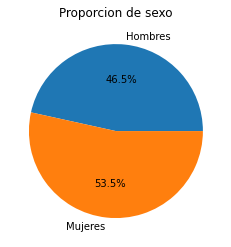

In [103]:
x = casos[['Sexo']]=="M"
z1= x.sum()/len(casos[['Sexo']])


y= casos[['Sexo']]=="F"
z2= y.sum()/len(casos[['Sexo']])

plt.figure(figsize=(4,4))
labels = ["Hombres","Mujeres"]
z=[z1,z2]
plt.pie(z, labels=labels, autopct='%1.1f%%')
plt.title('Proporcion de sexo')
plt.show()

In [105]:
casos['Nombre del país'].value_counts()

ESTADOS UNIDOS DE AMÉRICA                          350
ESPAÑA                                             123
MÉXICO                                             110
REPÚBLICA DOMINICANA                                33
ECUADOR                                             31
PANAMÁ                                              31
BRASIL                                              29
CHILE                                               25
TURQUÍA                                             17
FRANCIA                                             17
EL SALVADOR                                         14
EGIPTO                                              12
REINO UNIDO DE GRAN BRETAÑA E IRLANDA DEL NORTE     12
PERÚ                                                11
ARGENTINA                                           11
PUERTO RICO                                         10
ITALIA                                               8
ALEMANIA                                             8
PANAMA    

(array([8.15470e+04, 2.04088e+05, 3.82103e+05, 3.35431e+05, 2.31315e+05,
        1.42274e+05, 6.13020e+04, 2.02850e+04, 2.70900e+03, 3.20000e+01]),
 array([  1. ,  12.3,  23.6,  34.9,  46.2,  57.5,  68.8,  80.1,  91.4,
        102.7, 114. ]),
 <a list of 10 Patch objects>)

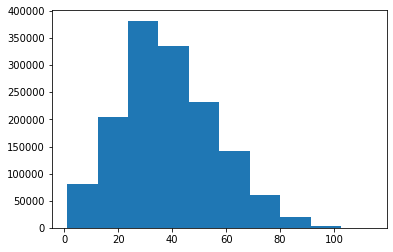

In [104]:
plt.hist(casos['Edad'])

In [108]:
casos['Recuperado'].value_counts()

Recuperado    1426800
Fallecido       27606
Activo           2800
fallecido         114
Name: Recuperado, dtype: int64

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.1400000e+02, 1.4278260e+05, 2.8545120e+05, 4.2811980e+05,
        5.7078840e+05, 7.1345700e+05, 8.5612560e+05, 9.9879420e+05,
        1.1414628e+06, 1.2841314e+06, 1.4268000e+06]),
 <a list of 10 Patch objects>)

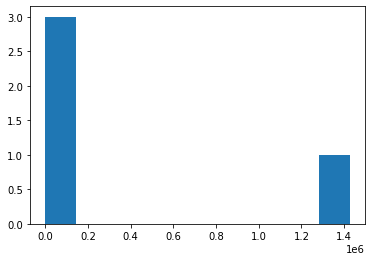

In [110]:
plt.hist(casos['Recuperado'].value_counts())

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


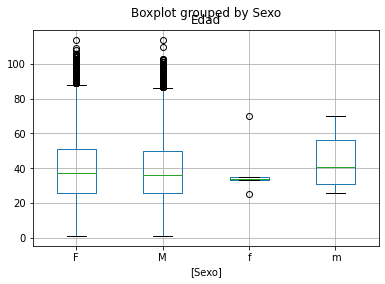

In [111]:
casos[['Edad','Sexo']].boxplot(by='Sexo')

In [7]:
nov_23 = casos[casos['Fecha de diagnóstico'] == '23/11/2021 0:00:00'].index
casos_1 = casos.drop(nov_23)
casos_1

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461080,24/11/2021 0:00:00,"5,055,235",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,46,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461081,24/11/2021 0:00:00,"5,055,249",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,60,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461082,24/11/2021 0:00:00,"5,055,275",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,31,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461083,24/11/2021 0:00:00,"5,055,276",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN


In [8]:
casos.shape

(1461086, 23)

In [ ]:
casos.info()

In [ ]:
casos.isna().sum()

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                 4807
Estado                             4807
Código ISO del país             1460147
Nombre del país                 1460147
Recuperado                         3766
Fecha de inicio de síntomas      467071
Fecha de muerte                 1428559
Fecha de diagnóstico                224
Fecha de recuperación             34286
Tipo de recuperación              34286
Pertenencia étnica                 1788
Nombre del grupo étnico         1450738
dtype: int64

In [336]:
casos=casos.drop_duplicates()
casos.shape

(1461086, 23)

In [ ]:
casos['Ubicación del caso'].value_counts()

Casa            1424879
casa                558
Hospital              9
Hospital UCI          8
Name: Ubicación del caso, dtype: int64

In [ ]:
casos[['Código ISO del país']]=casos[['Código ISO del país']].fillna('0').astype('str')
casos[['Código ISO del país']]

,Código ISO del país
0,380.0
1,724.0
2,724.0
3,724.0
4,724.0
...,...
1459217,0
1459228,0
1459231,0
1459251,0


In [ ]:
casos[['Nombre del país']]=casos[['Nombre del país']].fillna('0').astype('str')
casos[['Nombre del país']]

,Nombre del país
0,ITALIA
1,ESPAÑA
2,ESPAÑA
3,ESPAÑA
4,ESPAÑA
...,...
1459217,0
1459228,0
1459231,0
1459251,0


In [335]:
casos[['Fecha de inicio de síntomas']]=casos[['Fecha de inicio de síntomas']].fillna('NaN').astype('str')
casos[['Fecha de inicio de síntomas']]= casos['Fecha de inicio de síntomas'].str[:-7]
casos[['Fecha de inicio de síntomas']]

,Fecha de inicio de síntomas
0,27/
1,6/
2,7/
3,6/
4,6/
...,...
1461081,
1461082,
1461083,
1461084,


In [332]:
casos[['Fecha de muerte']]=casos[['Fecha de muerte']].fillna('0').astype('str')
casos[['Fecha de muerte']]

,Fecha de muerte
0,
1,
2,
3,
4,
...,...
1461081,
1461082,
1461083,
1461084,


In [ ]:
casos[['Nombre del grupo étnico']]=casos[['Nombre del grupo étnico']].fillna('0').astype('str')
casos[['Nombre del grupo étnico']]

,Nombre del grupo étnico
0,0
1,0
2,0
3,0
4,0
...,...
1461081,0
1461082,0
1461083,0
1461084,0


In [ ]:
casos=casos.dropna()
casos.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,0,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,0
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,0,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,0
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,0,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,0
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,0,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,0
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,0,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,0


In [ ]:
casos.isna().sum()

fecha reporte web               0
ID de caso                      0
Fecha de notificación           0
Código DIVIPOLA departamento    0
Nombre departamento             0
Código DIVIPOLA municipio       0
Nombre municipio                0
Edad                            0
Unidad de medida de edad        0
Sexo                            0
Tipo de contagio                0
Ubicación del caso              0
Estado                          0
Código ISO del país             0
Nombre del país                 0
Recuperado                      0
Fecha de inicio de síntomas     0
Fecha de muerte                 0
Fecha de diagnóstico            0
Fecha de recuperación           0
Tipo de recuperación            0
Pertenencia étnica              0
Nombre del grupo étnico         0
dtype: int64

In [ ]:
casos.shape

(1425454, 23)

In [9]:
datos = casos_1.copy()

In [10]:
#SE TOMA LA FECHA DE DIAGNÓSTICO SIN LA HORA
datos['Fecha de diagnóstico']=datos['Fecha de diagnóstico'].str[:-7]
datos.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,31/3/2020 0:00:00,PCR,6.0,NaN


In [11]:
datos.insert(19,'x',np.ones(datos.shape[0]))
datos

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,x,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020,1.0,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020,1.0,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020,1.0,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,1.0,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,1.0,31/3/2020 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461080,24/11/2021 0:00:00,"5,055,235",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,46,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021,1.0,NaN,NaN,NaN,NaN
1461081,24/11/2021 0:00:00,"5,055,249",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,60,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021,1.0,NaN,NaN,NaN,NaN
1461082,24/11/2021 0:00:00,"5,055,275",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,31,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021,1.0,NaN,NaN,NaN,NaN
1461083,24/11/2021 0:00:00,"5,055,276",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021,1.0,NaN,NaN,NaN,NaN


In [27]:
serie = datos[['Fecha de diagnóstico','x']]
serie

,Fecha de diagnóstico,x
0,6/3/2020,1.0
1,11/3/2020,1.0
2,11/3/2020,1.0
3,12/3/2020,1.0
4,12/3/2020,1.0
...,...,...
1461080,22/11/2021,1.0
1461081,22/11/2021,1.0
1461082,22/11/2021,1.0
1461083,22/11/2021,1.0


In [28]:
serie['Fecha de diagnóstico'] = pd.to_datetime(serie['Fecha de diagnóstico'],dayfirst = True) #Transformamos en una fecha 
serie = serie.set_index('Fecha de diagnóstico')
serie


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x
Fecha de diagnóstico,
2020-03-06,1.0
2020-03-11,1.0
2020-03-11,1.0
2020-03-12,1.0
2020-03-12,1.0
...,...
2021-11-22,1.0
2021-11-22,1.0
2021-11-22,1.0


In [29]:
serie = serie.rename(columns={'x': 'y'})

In [30]:
serie = serie.resample('D').sum()
serie

,y
Fecha de diagnóstico,
2020-03-06,1.0
2020-03-07,0.0
2020-03-08,0.0
2020-03-09,0.0
2020-03-10,0.0
...,...
2021-11-18,374.0
2021-11-19,330.0
2021-11-20,274.0


In [31]:
serie = serie['y']
serie = serie.sort_index()
serie

Fecha de diagnóstico
2020-03-06      1.0
2020-03-07      0.0
2020-03-08      0.0
2020-03-09      0.0
2020-03-10      0.0
              ...  
2021-11-18    374.0
2021-11-19    330.0
2021-11-20    274.0
2021-11-21    171.0
2021-11-22    230.0
Name: y, Length: 627, dtype: float64

In [32]:
(serie.index == pd.date_range(start=serie.index.min(),
                              end=serie.index.max(),
                              freq=serie.index.freq)).all()

True

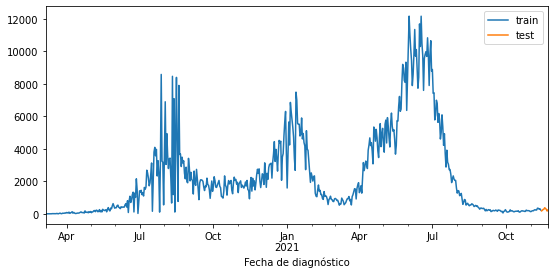

In [58]:
steps = 9
datos_train = serie[:-steps]
datos_test  = serie[-steps:]

fig, ax=plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
ax.legend();

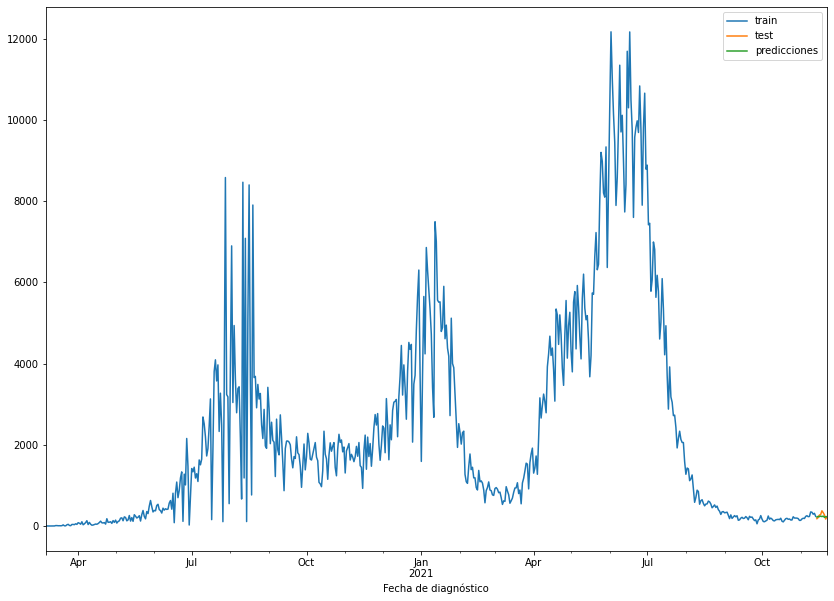

In [74]:
fig, ax = plt.subplots(figsize=(14, 10))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

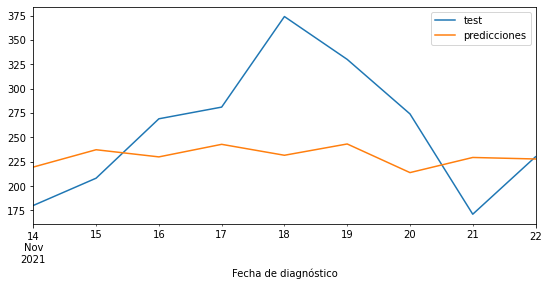

In [75]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [76]:
error_mse = mean_squared_error(
                y_true = datos_test,
                y_pred = predicciones
            )
print(f"Error de test (mse): {error_mse}")

Error de test (mse): 4474.862077777778
